# KNN no `chb11_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb11_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.900000,0.975000,0.954167,0.962500,0.875000,0.979167,0.970833,0.966667,0.658333,0.916667,0.737500,0.895833,0.633333,0.683333,0.804167,0.845833,0.979167,0.941667
1,0.854167,0.958333,0.925000,0.950000,0.870833,0.979167,0.966667,0.970833,0.666667,0.895833,0.750000,0.887500,0.591667,0.720833,0.829167,0.837500,0.983333,0.933333
2,0.900000,0.962500,0.954167,0.958333,0.858333,0.966667,0.958333,0.962500,0.704167,0.870833,0.783333,0.875000,0.608333,0.712500,0.762500,0.845833,0.954167,0.912500
3,0.866667,0.962500,0.945833,0.954167,0.866667,0.966667,0.970833,0.958333,0.645833,0.879167,0.766667,0.879167,0.645833,0.679167,0.762500,0.829167,0.962500,0.937500
4,0.891667,0.975000,0.970833,0.970833,0.912500,0.991667,0.966667,0.962500,0.650000,0.929167,0.812500,0.870833,0.562500,0.695833,0.770833,0.825000,0.987500,0.941667
5,0.845833,0.941667,0.929167,0.950000,0.866667,0.979167,0.962500,0.954167,0.620833,0.908333,0.729167,0.862500,0.600000,0.700000,0.787500,0.841667,0.966667,0.916667
6,0.883333,0.966667,0.937500,0.966667,0.833333,0.983333,0.966667,0.954167,0.637500,0.929167,0.745833,0.858333,0.645833,0.720833,0.775000,0.825000,0.966667,0.929167
7,0.862500,0.958333,0.941667,0.966667,0.895833,0.979167,0.962500,0.962500,0.650000,0.900000,0.791667,0.879167,0.641667,0.758333,0.804167,0.854167,0.987500,0.937500
8,0.875000,0.941667,0.937500,0.945833,0.850000,0.983333,0.983333,0.958333,0.637500,0.908333,0.791667,0.887500,0.600000,0.729167,0.766667,0.841667,0.966667,0.941667
9,0.850000,0.966667,0.929167,0.945833,0.875000,0.966667,0.970833,0.962500,0.666667,0.887500,0.816667,0.895833,0.650000,0.695833,0.829167,0.841667,0.979167,0.937500


,count,mean,std,min,25%,50%,75%,max
5,20.0,0.977917,0.006906,0.966667,0.973958,0.979167,0.983333,0.991667
16,20.0,0.973333,0.011343,0.945833,0.966667,0.975000,0.980208,0.991667
6,20.0,0.966042,0.009585,0.945833,0.958333,0.966667,0.970833,0.987500
1,20.0,0.957917,0.010375,0.941667,0.950000,0.958333,0.963542,0.975000
7,20.0,0.956875,0.008685,0.937500,0.953125,0.958333,0.962500,0.970833
3,20.0,0.950000,0.011471,0.929167,0.941667,0.950000,0.955208,0.970833
2,20.0,0.938542,0.014106,0.908333,0.928125,0.939583,0.946875,0.970833
17,20.0,0.931875,0.013195,0.908333,0.926042,0.935417,0.941667,0.954167
9,20.0,0.905000,0.015972,0.870833,0.895833,0.908333,0.913542,0.929167
0,20.0,0.873125,0.024087,0.829167,0.854167,0.870833,0.892708,0.925000


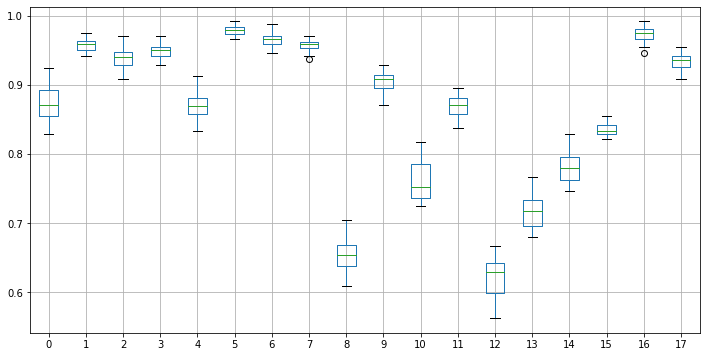

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '11'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.873125,0.024087,0.870833,11,0
1,0.957917,0.010375,0.958333,11,1
2,0.938542,0.014106,0.939583,11,2
3,0.950000,0.011471,0.950000,11,3
4,0.870208,0.020290,0.868750,11,4
5,0.977917,0.006906,0.979167,11,5
6,0.966042,0.009585,0.966667,11,6
7,0.956875,0.008685,0.958333,11,7
8,0.655833,0.024978,0.654167,11,8
9,0.905000,0.015972,0.908333,11,9
